In [62]:
!pip install aguaclara


In [0]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import numpy as np
import matplotlib.pyplot as plt

$$ \Pi_{\varepsilon} = \frac{\varepsilon_{Max}}{\bar \varepsilon}$$

Solve for $\varepsilon_{Max}$

$$ \varepsilon_{Max}=\Pi_{\varepsilon}\bar \varepsilon $$

$$\bar \varepsilon = \frac{(n-1)\varepsilon_{Min} + \varepsilon_{Max}}{n} $$
Now we can solve for $\varepsilon_{Min}$

$$\varepsilon_{Min} = \frac{n \bar \varepsilon - \varepsilon_{Max}}{n-1}$$

Now eliminate $\varepsilon_{Max}$

$$\varepsilon_{Min} = \frac{n  - \Pi_{\varepsilon}}{n-1}\bar \varepsilon$$

The equation for $\bar G$ is the same for as the equation for $\bar \varepsilon$.

$$\bar G = \frac{(n-1)G_{Min} + G_{Max}}{n} $$

We can write the previous equation in terms of the energy dissipation rate.

$$ \bar G = \frac{(n-1)\sqrt{\frac{\varepsilon_{Min}}{\nu}} + \sqrt{\frac{\varepsilon_{Max}}{\nu}}}{n} $$

The deformation efficiency $\Pi_{G\theta_e}$ is the ratio of the true average velocity gradient divided by $\sqrt{\frac{\bar \varepsilon}{\nu}}$

$$ \Pi_{G\theta_e} =  \frac{\sqrt{\frac{\varepsilon_{Min}}{\nu}}(n-1) + \sqrt{\frac{\varepsilon_{Max}}{\nu}}}{n\sqrt{\frac{\bar \varepsilon}{\nu}}}$$

Now eliminate $\varepsilon_{Max}$ and $\varepsilon_{Min}$

$$ \Pi_{G\theta_e} =  \frac{\sqrt{\frac{\frac{n  - \Pi_{\varepsilon}}{n-1}\bar \varepsilon}{\nu}}(n-1) + \sqrt{\frac{\Pi_{\varepsilon}\bar \varepsilon}{\nu}}}{n\sqrt{\frac{\bar \varepsilon}{\nu}}}$$

$$ \Pi_{G\theta_e} =  \frac{\sqrt{(n  - \Pi_{\varepsilon})(n-1)} + \sqrt{\Pi_{\varepsilon}}}{n}$$

The minimum number of compartments, n, required to produce $\Pi_{\varepsilon}$ and thus obtain a real result to the equation above is 

$$ n > \Pi_{\varepsilon}$$

This requirement for n is simply stating that for large differences between the average and maximum values of the energy dissipation rate the maximum values of the energy dissipation rate must be concentrated in a small fraction of the reactor volume. It would be possible to introduce yet another dimensionless factor which is the ratio of $\frac{n}{\Pi_{\varepsilon}}$.

In [64]:
EDR_Ave = 24 * u.mW/u.kg
Ratio_EDR = 400**2
EDR_Max = EDR_Ave * Ratio_EDR

n_Min = Ratio_EDR
n=np.ceil(1.3*n_Min)
print('The minimum value of n to obtain a real solution is',n_Min)
nu = 1*u.mm**2/u.s
EDR_Min = (n*EDR_Ave-EDR_Max)/(n-1)
G_Ave = ((np.sqrt(EDR_Min/nu) * (n-1) + np.sqrt(EDR_Max/nu))/n).to(1/u.s)
print('The average velocity gradient is', G_Ave)
G_pseudo = (np.sqrt(EDR_Ave/nu)).to(1/u.s)
print('The pseudo average velocity gradient is',G_pseudo)
G_Efficiency = G_Ave/G_pseudo
print('The deformation efficiency is',G_Efficiency)
Ratio_G = np.sqrt(Ratio_EDR)
print('The ratio of velocity gradients (max to average) is',Ratio_G)



The minimum value of n to obtain a real solution is 160000
The average velocity gradient is 74.72 / second
The pseudo average velocity gradient is 154.9 / second
The deformation efficiency is 0.4823 dimensionless
The ratio of velocity gradients (max to average) is 400.0


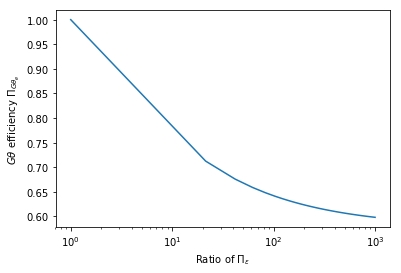

In [68]:
def Gt_Efficiency(n,Ratio_EDR):
  return (np.sqrt((n-Ratio_EDR)*(n-1)) + np.sqrt(Ratio_EDR))/n

points = 50
Ratio_EDR_graph = np.linspace(1,1000,points)
n_graph = Ratio_EDR_graph * 1.5

Gt_Efficiency_graph = np.empty_like(Ratio_EDR_graph)

for i in range(0,points):
  Gt_Efficiency_graph[i] = Gt_Efficiency(n_graph[i],Ratio_EDR_graph[i])

plt.plot(Ratio_EDR_graph,Gt_Efficiency_graph); 
plt.xlabel(r'Ratio of $\Pi_{\varepsilon}$');
plt.ylabel(r'$G\theta$ efficiency $\Pi_{G\theta_e}$');
plt.xscale('log')
plt.show()